# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, linspace, pi, random, sign, sin

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

In [2]:
# code for solving the model (remember documentation and comments)
# We import scipy and numpy
import scipy
import numpy as np
from scipy import optimize 
from scipy.optimize import minimize
import itertools as it

# We define a function that returns the values of l and c that maximize the utility function

def optimization(w, m=1, v=10, epsilon=0.3, tau0=0.4, tau1=0.1, kappa=0.4):
    """solves the optimization problem"""
    
    # We define the utility function, and since c* = x, we insert the expression for x into the utility function.
    def utility(l):
        """Returns the utility for as a function of labor supply"""
        return np.log(m + w*l - (tau0*w*l + tau1*max(w*l-kappa,0))) - v*(l**(1+(1/epsilon)))/(1+(1/epsilon))
    
    # Run the minimization
    res = scipy.optimize.minimize_scalar(lambda x: -utility(x), bounds=(0, 1), method='bounded')
    
    # Return a tuple with the values (l*,c*)    
    return (res.x, m + w*(res.x) - (tau0*w*(res.x) + tau1*max(w*(res.x)-kappa,0)))

# Example with w = 1
optimization(1)

print(f'The level of labour that maximizes utility is 0,4')
print(f'The level of consumption that maximizes utility is 1,24')

The level of labour that maximizes utility is 0,4
The level of consumption that maximizes utility is 1,24


# Question 2

<function matplotlib.pyplot.show(*args, **kw)>

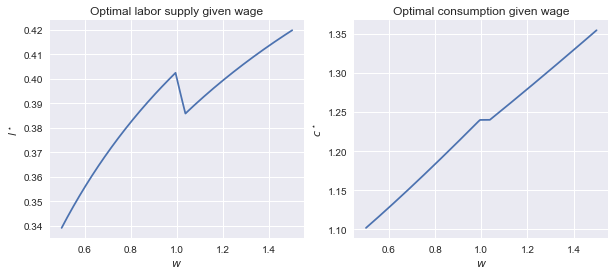

In [3]:
# We make a for loop that loops over values of w with np.linspace.

N = 10000
# We define 
_w = np.linspace(0.5,1.5,N)
_c = np.empty(N)
_l = np.empty(N)

# We loop through values of w

for i,w in enumerate(_w):
    _l[i] = optimization(w)[0]
    _c[i] = optimization(w)[1]
    
plt.style.use('seaborn')
fig = plt.figure(figsize=(10,4))

#subplot 1
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(_w,_l)

ax_left.set_title('Optimal labor supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

#subplot 2
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(_w, _c)
ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

plt.show

By inspecting the graphs it is evident that the optimal supply of labor and consumption are positive functions of the wage. Thus higher wages lead to higher consumption. The kinks in the respective curves highlight the point where the consumers income goes from being taxed through the standard labor income tax, to the top bracket labor income tax.


# Question 3

In [4]:
# We simulate the uniform distribution with seed 110
np.random.seed(117)
w_rand = np.random.uniform(0.5,1.5,N)

tax = 0
for w in w_rand:
    tax+= 0.4*w*optimization(w)[0] + 0.1*max(w*optimization(w)[0]-0.4,0)

print(f'We get a tax revenue of: {tax: 0.2f}')

We get a tax revenue of:  1629.33


# Question 4

In [5]:
# Same procedure as in question 3, but with a different value for epsilon
tax = 0
for w in w_rand:
        tax+= 0.4*w*optimization(w,epsilon=0.1)[0] + 0.1*max(w*optimization(w,epsilon=0.1)[0]-0.4,0)
print(f'Given epsilon=0.1 we get a tax revenue of: {tax: 0.2f}')

Given epsilon=0.1 we get a tax revenue of:  3195.23


As the elasticity of labour supply (epsilon) decreases the tax revenue increases. Intuitively this means, that the consumers behaviour on the labour market is relatively less affected by changes in taxes, why the tax revenue increases.


# Question 5

In [6]:
# We start by defining a function, that calculates the total tax revenue.
# This function incorporates the consumer's maximization problem, so the the politician will take their decisions into account
# If this was not the case, the optimal taxes would be 1.

def calculate_tax(x):
    """Calculates the total tax revenue, incorporating the consumer's problem by 
    using the optimization function previously defined.
    
    The function takes a vector of parameters as input (tau1, tau2, kappa) = (x[0],x[1],x[2]).
    """
    
    # Generates the wages
    np.random.seed(117)
    w_rand = np.random.uniform(0.5,1.5,N)
    
    # calculates the total tax
    tax = 0
    for w in w_rand:
        tax+= x[0]*w*optimization(w,tau0=x[0],tau1=x[1],kappa=x[2])[0] + x[1]*max(w*optimization(w,tau0=x[0],tau1=x[1],kappa=x[2])[0]-x[2],0)
    
    # Returns the negative tax to be minimized
    return -tax

# Defines initial values
x00 = [0,0,0]

# Defines bounds for parameters, all assumed to be between 0 and 1.
bounds = scipy.optimize.Bounds([0, 0, 0], [1, 1, 1])

# Runs the minimization. This takes a while, as it has to incorporate the consumer's minimization problem in every iteration.
# We limit the maximum number of iterations to 100. This reduces the precision of the values.
result = scipy.optimize.minimize(calculate_tax,x0 = x00,method='SLSQP',
                           options={'maxiter':100,}, bounds=bounds)

# Print statement that shows the optimal values of tau0, tau1 and kappa. We round up to 1 decimal.

print(f'The optimal value of tau0 is {result.x[0]:.1}''\n'
     f'The optimal value of tau1 is {result.x[1]:.1}''\n'
     f'The optimal value of kappa is {result.x[2]:.2}''\n')

The optimal value of tau0 is 0.7
The optimal value of tau1 is 0.1
The optimal value of kappa is 0.0



# Question 6

In order to solve the Labour Supply problems presented in this assignment, Python code was constructed. More specifically code with the aim of optimizing the specified maximization problems. Additonaly the optimal choices of respectively labour and consumption are found through graphical analyses. To calculate the tax revenue these values are used. Furthermore the impact of changes in the Firsch elasticity of labour supply on tax revenue is analyzed and it is concluded that these have a significant impact.
To conclude with the optimal values of the standard labour income tax and the top bracket labor income tax are found by maximizing the tax revenue. 